L'anàlisi de registres és una funció important per al control i l'alerta, el compliment de les polítiques de seguretat, l'auditoria i el compliment normatiu, la resposta a incidents de seguretat i fins i tot les investigacions forenses. En analitzar les dades de registre, les empreses poden identificar més fàcilment les possibles amenaces i altres problemes, trobar la causa arrel i iniciar una resposta ràpida per mitigar els riscos.
# Nivell 1
L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han d'estandaritzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.

Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".


In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import re
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
%cd'/content/drive/MyDrive'

/content/drive/MyDrive


In [3]:
%cd'Sprint 4'

/content/drive/MyDrive/Sprint 4


## Exercici 1
**Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".**

In [4]:
#Obrim el txt i el posem a una columna per a que poder treballar amb ella
df =pd.read_table('Web.txt', names=['Columna'])
df

,Columna
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...


Separem la informació més rellevant i contruim el df amb les següents columnes:
Site, IP, la data y hora del registre i la ruta web que ha accedit l'usuari

In [6]:
df['Site'] = df['Columna'].str.extract('(^www.akumenius.com)')
df['IP'] = df['Columna'].str.extract('(\d+\.\d\.\d\.\d|\d+\.\d+\.\d+\.\d+)')
df['Date'] = df['Columna'].str.extract('\[(.+)\] ')
df['Page'] = df['Columna'].str.extract('GET (.+).HTTP')
df.sample(10)

,Columna,Site,IP,Date,Page
17155,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,23/Feb/2014:13:46:12 +0100,/hoteles-baratos/ofertas-hotel-Medina-Serviced...
206435,www.akumenius.com 195.77.62.138 - - [27/Feb/20...,www.akumenius.com,195.77.62.138,27/Feb/2014:16:15:55 +0100,/includes/images/icons/bcoos_next.png
143425,www.akumenius.com 66.249.76.216 - - [25/Feb/20...,www.akumenius.com,66.249.76.216,25/Feb/2014:22:44:49 +0100,/destinos-ajax2/hoteles-en-ISLAS-VIRGENES-USA_VI
256062,www.akumenius.com 80.30.133.95 - - [01/Mar/201...,www.akumenius.com,80.30.133.95,01/Mar/2014:19:05:19 +0100,/hoteles-baratos/hoteles-todo-incluido.html
56340,www.akumenius.com 90.175.210.151 - - [24/Feb/2...,www.akumenius.com,90.175.210.151,24/Feb/2014:12:14:11 +0100,/modules/raton/views/themes/bcoos/css/portalTo...
179014,www.akumenius.com 79.145.213.52 - - [26/Feb/20...,www.akumenius.com,79.145.213.52,26/Feb/2014:22:47:12 +0100,/modules/raton/views/themes/bcoos/images/busca...
20247,www.akumenius.com 5.10.83.22 - - [23/Feb/2014:...,www.akumenius.com,5.10.83.22,23/Feb/2014:15:22:30 +0100,/destinosEstrelles/hoteles-en-Amravati_INDIA-c...
201324,test.akumenius.com 80.28.221.123 - - [27/Feb/2...,NaN,80.28.221.123,27/Feb/2014:15:24:43 +0100,/newdesign/libraries/anythingSlider/images/2a.png
199037,test.akumenius.com 80.28.221.123 - - [27/Feb/2...,NaN,80.28.221.123,27/Feb/2014:15:04:35 +0100,/newdesign/libraries/anythingSlider/images/5a.png
115704,www.akumenius.com 66.249.76.216 - - [25/Feb/20...,www.akumenius.com,66.249.76.216,25/Feb/2014:16:06:59 +0100,/destinos-caracteristicas/hoteles-baratos-en-A...


In [8]:
#Eliminem la columna inicial ja que ja no ens cal
df.pop('Columna')

0         localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1         localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2         localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3         localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4         localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
                                ...                        
261868    www.akumenius.com 5.255.253.53 - - [02/Mar/201...
261869    www.akumenius.com 74.86.158.107 - - [02/Mar/20...
261870    localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...
261871    localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...
261872    localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...
Name: Columna, Length: 261873, dtype: object

In [9]:
df.sample(10)

,Site,IP,Date,Page
94106,www.akumenius.com,66.249.76.216,25/Feb/2014:08:21:10 +0100,/destinos-caracteristicas/hoteles-baratos-en-P...
174301,www.akumenius.com,81.45.52.104,26/Feb/2014:19:43:48 +0100,NaN
8381,www.akumenius.com,66.249.76.216,23/Feb/2014:09:32:36 +0100,/destinos-baratos/hoteles-baratos/ofertas-hote...
52609,www.akumenius.com,157.55.35.96,24/Feb/2014:10:27:57 +0100,/escapadas/escapada-warner-hotel-confortel-sui...
189222,www.akumenius.com,66.249.75.148,27/Feb/2014:11:09:34 +0100,/destinos-caracteristicas/hoteles-baratos-en-L...
233009,www.akumenius.com,79.108.195.164,28/Feb/2014:11:27:00 +0100,/modules/raton/views/themes/bcoos/css/blocks/b...
23995,www.akumenius.com,66.249.76.216,23/Feb/2014:16:34:16 +0100,/destinosCaracteristicas/hoteles-baratos-en-In...
209054,www.akumenius.com,80.28.221.123,27/Feb/2014:16:37:53 +0100,/libraries/anythingSlider/images/4a.png
174051,www.akumenius.com,212.89.8.125,26/Feb/2014:19:38:16 +0100,/modules/raton/views/themes/bcoos/images/busca...
64880,www.akumenius.com,213.143.61.8,24/Feb/2014:13:15:16 +0100,/hotel-list


# Nivell 2
## Exercici 2
**Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.**

In [10]:
#Mirem quants valors nuls hi ha en el df
df.isnull().sum()

Site    29573
IP          0
Date        0
Page    32391
dtype: int64

In [11]:
df.describe()

,Site,IP,Date,Page
count,232300,261873,261873,229482
unique,1,2921,118742,65780
top,www.akumenius.com,66.249.76.216,28/Feb/2014:04:16:25 +0100,/
freq,232300,46382,83,2299


In [12]:
#Eliminem les files on tenim valors nuls
df = df.dropna()

In [13]:
#Mirem el tipo de dada que conformen cada columna i veiem que la data es tractada com una dada categòriga
df.dtypes

Site    object
IP      object
Date    object
Page    object
dtype: object

Com que la variable 'Date' està interpretada com a una variable categòrica, la hem de tranforma a una variable datetime per poder treballar-la com a tal.

In [19]:
df1 = df.sample(10000)
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%b/%Y:%X %z')

In [20]:
df1.dtypes

Site                                  object
IP                                    object
Date    datetime64[ns, pytz.FixedOffset(60)]
Page                                  object
dtype: object

## Exercici 3
**Geolocalitza les IP's.**

Importem les llibrerires necessàries i agafem una mostra del df ja que és un procés que tarda molt. 

In [21]:
import requests
import json
df2 = df.sample(1000)

Creem una funció perque tradueixi una ip especificada en un diccionari amb informació de la geolocalització de la ip. Decodifiquem el valor rebut i ens quedem amb la informació que ens interessa.


In [22]:
def fun(ip):
  request_url = 'https://geolocation-db.com/jsonp/' + ip
  response = requests.get(request_url)
  result = response.content.decode()
  result = result.split("(")[1].strip(")")
  result = json.loads(result)
  return result['country_name']

df2['Country'] = df2['IP'].apply(fun)
df2

,Site,IP,Date,Page,Country
224889,www.akumenius.com,66.249.76.216,28/Feb/2014:01:05:19 +0100,/destinos-caracteristicas/hoteles-baratos-en-B...,United States
78152,www.akumenius.com,212.145.69.53,24/Feb/2014:17:49:03 +0100,/libraries/jqueryui/css/ui-lightness/jquery-ui...,Spain
237255,www.akumenius.com,200.24.215.217,28/Feb/2014:17:29:21 +0100,/modules/raton/views/themes/bcoos/images/boto_...,Ecuador
160419,www.akumenius.com,31.4.236.29,26/Feb/2014:12:39:45 +0100,//libraries/anythingSlider/images/4a.png,Spain
43858,www.akumenius.com,66.249.76.216,24/Feb/2014:02:16:14 +0100,/destinosCaracteristicas/hoteles-baratos-en-Ru...,United States
...,...,...,...,...,...
26868,www.akumenius.com,183.60.214.6,23/Feb/2014:18:21:45 +0100,/destinos-baratos/hoteles-en-Pe%C3%B1iscola_ES...,China
236758,www.akumenius.com,81.45.52.195,28/Feb/2014:16:28:12 +0100,/libraries/jqueryui/css/ui-lightness/jquery-ui...,Spain
93304,www.akumenius.com,199.30.24.118,25/Feb/2014:06:36:43 +0100,/modules/raton/views/themes/bcoos/js/blocks/bo...,United States
101791,www.akumenius.com,144.76.2.2,25/Feb/2014:11:45:33 +0100,/hoteles-baratos/ofertas-hotel-Termalia-Reside...,Germany


# Nivell 3
## Exercici 3
**Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.**

In [ ]:
import datetime as dt
df1['Date'].dt.time

64456     13:10:46
4365      05:18:34
157684    11:45:21
46689     05:33:34
151522    07:04:05
            ...   
137673    20:38:17
85444     20:57:48
145926    00:15:26
77192     17:17:31
15733     13:00:15
Name: Date, Length: 10000, dtype: object

Gràfica en la que podem veure la evolució de les entrades a la pàgina web desde desde el 23 de Febrerer fins al 2 de Març.
Veiem que l'evolució de les entrades a la web han tingut una evolució dscendent.

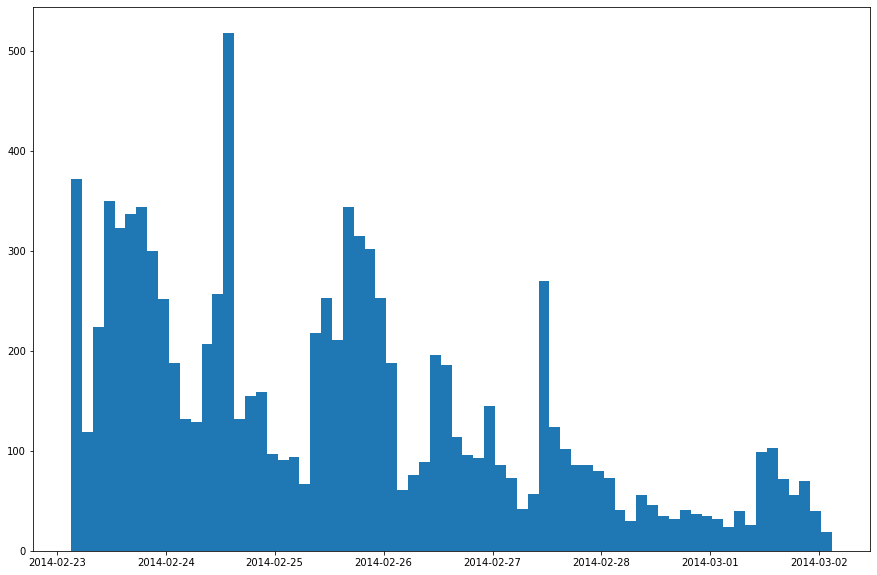

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.hist(x = 'Date', data = df1, bins = 70)
plt.grid=True

In [ ]:
df2.Country

41564     United States
5363      United States
24940     United States
185466    United States
170915            Spain
              ...      
5482      United States
152362    United States
36428             China
70028             Spain
13703     United States
Name: Country, Length: 1000, dtype: object

Gràfica en la que veiem les quantitats d'entrades a la web, classificades pel país en el que es va fer la búsqueda.
Veiem que la gran majoría de les entrades s'han realitzat a Estats Units i a Espanya.

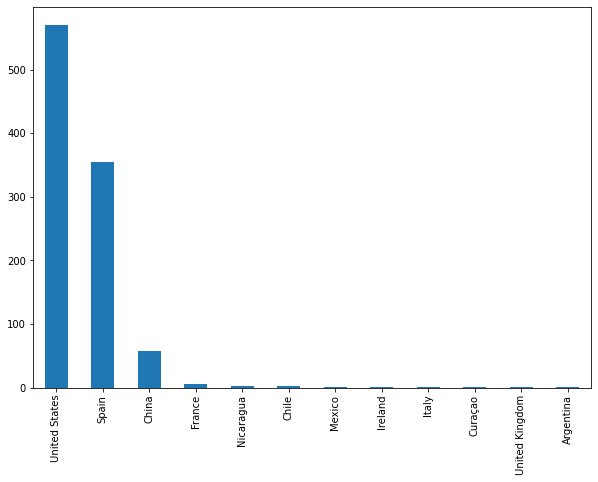

In [ ]:
df2['Country'].value_counts().plot(figsize = (10,7), kind='bar')

In [ ]:
time = df1['Date'].dt.hour.sort_values()
time = pd.DataFrame(time)
time

,Date
260511,0
40541,0
41744,0
41731,0
40696,0
...,...
222155,23
144565,23
39291,23
143828,23


En la següent gràfica podem veure quines són les hores en les que hi ha més tràfic en la pàgina web.
Com podem veure hi ha un pic de tràfic a les 12h i dos mínim a les 2h i 7h.

Text(0, 0.5, 'Amount of entries')

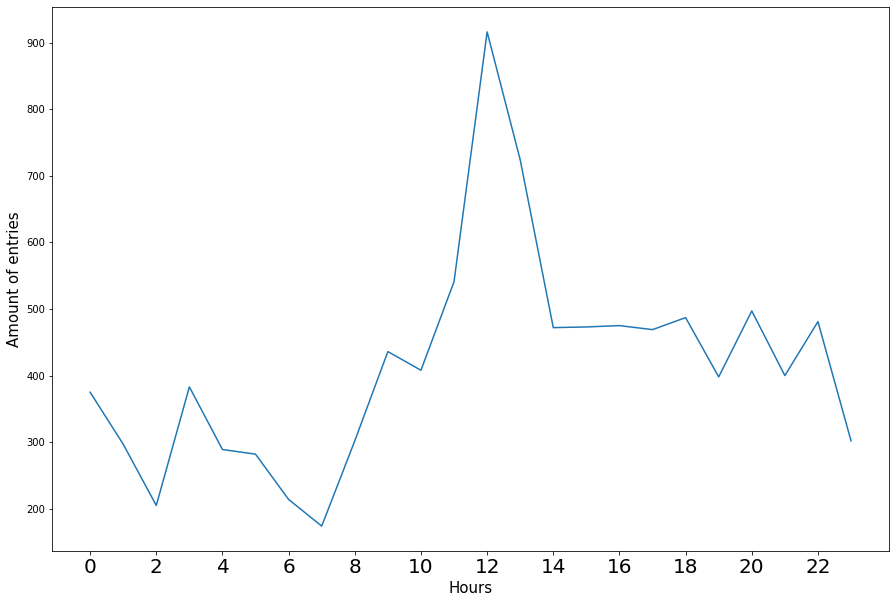

In [ ]:
time.groupby('Date').Date.count().plot(figsize=(15,10))
plt.xticks(np.arange(0, 23, 2), fontsize=20)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Amount of entries', fontsize=15)